In [1]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

path = 'https://frenzy86.s3.eu-west-2.amazonaws.com/python/text_2_clean.csv'
df = pd.read_csv(path)
df

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative
...,...,...,...,...
27476,4eac33d1c0,wish we could come see u on Denver husband l...,d lost,negative
27477,4f4c4fc327,I`ve wondered about rake to. The client has ...,", don`t force",negative
27478,f67aae2310,Yay good for both of you. Enjoy the break - y...,Yay good for both of you.,positive
27479,ed167662a5,But it was worth it ****.,But it was worth it ****.,positive


In [2]:
# STEP1 DEFINIRE ED APPLICARE LA REGEX
df = pd.read_csv(path)

patterns = {
            r'\d+': '',             # remove digits (numeri)
            r'[^\w\s]': '',         # remove punteggiatura e simboli ...,'@!£$%
            r'\b\w{1,2}\b':'',      # remove all token less than2 characters
            r'(http|www)[^\s]+':'', # remove website
            r'\s+': ' '             # sostituisce tutti i multipli spazi con uno spazio
            }

def clean_column(df, column, patterns):
    for pattern, replacement in patterns.items():
        df[column] = df[column].str.replace(pattern, replacement)
        df[column] = df[column].str.lower() # applica il lower
    return df

#solo in preview
clean_column(df, 'text', patterns)

,textID,text,selected_text,sentiment
0,cb774db0d1,have responded were going,"I`d have responded, if I were going",neutral
1,549e992a42,sooo sad will miss you here san diego,Sooo SAD,negative
2,088c60f138,boss bullying,bullying me,negative
3,9642c003ef,what interview leave alone,leave me alone,negative
4,358bd9e861,sons why couldnt they put them the releases a...,"Sons of ****,",negative
...,...,...,...,...
27476,4eac33d1c0,wish could come see denver husband lost his j...,d lost,negative
27477,4f4c4fc327,ive wondered about rake the client has made c...,", don`t force",negative
27478,f67aae2310,yay good for both you enjoy the break you pro...,Yay good for both of you.,positive
27479,ed167662a5,but was worth,But it was worth it ****.,positive


In [3]:
# applichiamo la regex
df = clean_column(df, 'text', patterns)
df

,textID,text,selected_text,sentiment
0,cb774db0d1,have responded were going,"I`d have responded, if I were going",neutral
1,549e992a42,sooo sad will miss you here san diego,Sooo SAD,negative
2,088c60f138,boss bullying,bullying me,negative
3,9642c003ef,what interview leave alone,leave me alone,negative
4,358bd9e861,sons why couldnt they put them the releases a...,"Sons of ****,",negative
...,...,...,...,...
27476,4eac33d1c0,wish could come see denver husband lost his j...,d lost,negative
27477,4f4c4fc327,ive wondered about rake the client has made c...,", don`t force",negative
27478,f67aae2310,yay good for both you enjoy the break you pro...,Yay good for both of you.,positive
27479,ed167662a5,but was worth,But it was worth it ****.,positive


In [4]:
df['sentiment'].value_counts()

neutral     11118
positive     8582
negative     7781
Name: sentiment, dtype: int64

In [5]:
df['text'].head(10)

0                            have responded were going
1                sooo sad will miss you here san diego
2                                       boss bullying 
3                           what interview leave alone
4     sons why couldnt they put them the releases a...
5     some shameless plugging for the best rangers ...
6     feedings for the baby are fun when all smiles...
7                                           soooo high
8                                             both you
9     journey wow just became cooler hehe that poss...
Name: text, dtype: object

In [6]:
text_neutral = list(map(str, df[df['sentiment']=='neutral']['text']))
text_positive = list(map(str, df[df['sentiment']=='positive']['text']))
text_negative = list(map(str, df[df['sentiment']=='negative']['text']))

text_neutral = ''.join(text_neutral)
text_positive = ''.join(text_positive)
text_negative = ''.join(text_negative)

(-0.5, 799.5, 399.5, -0.5)

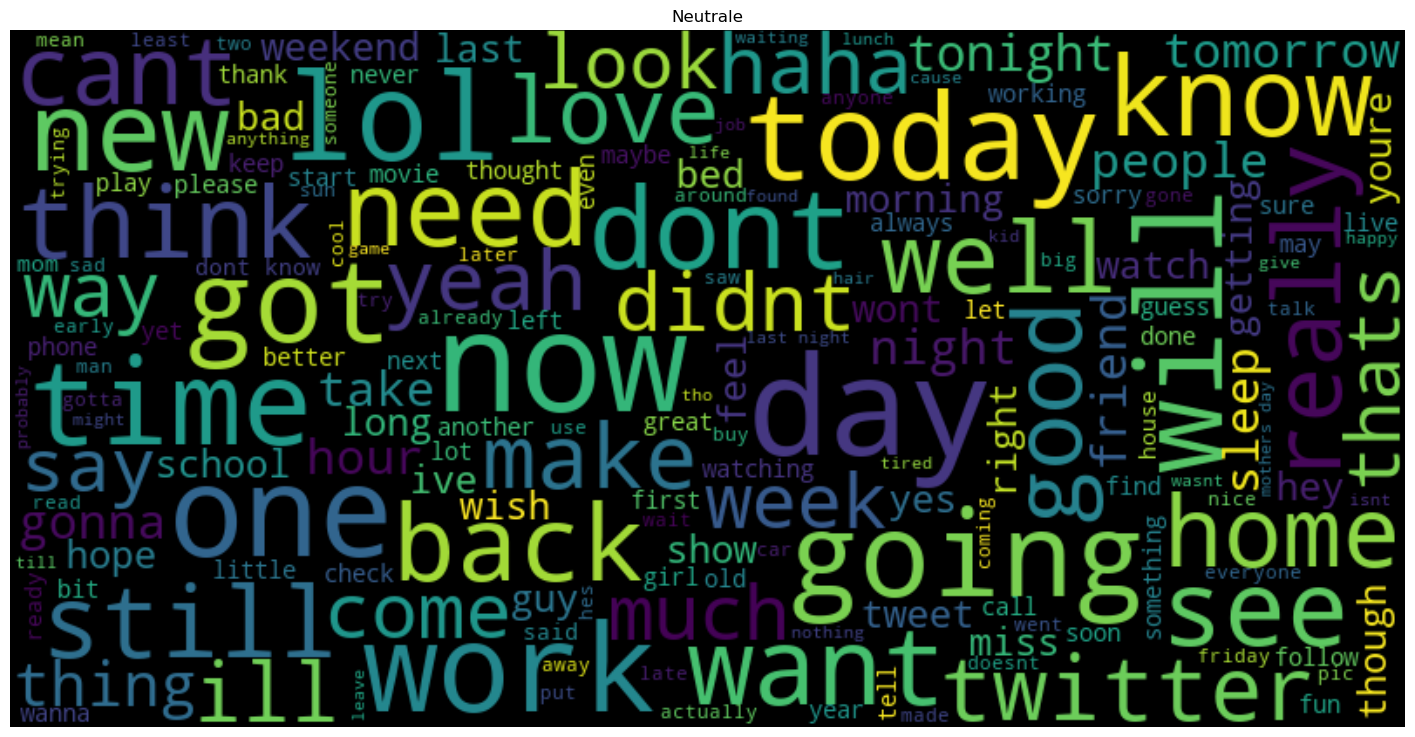

In [8]:
## STEP 2 : EDA con WORDCLOUD
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

wordcloud = WordCloud(background_color = 'black', width = 800, height = 400,
                      max_words = 180, contour_width = 3,
                      max_font_size = 80, contour_color = 'steelblue',
                      stopwords = STOPWORDS, random_state = 667)

wordcloud.generate(text_neutral)

plt.figure(figsize=(18,10))
plt.title('Neutrale')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")

(-0.5, 799.5, 399.5, -0.5)

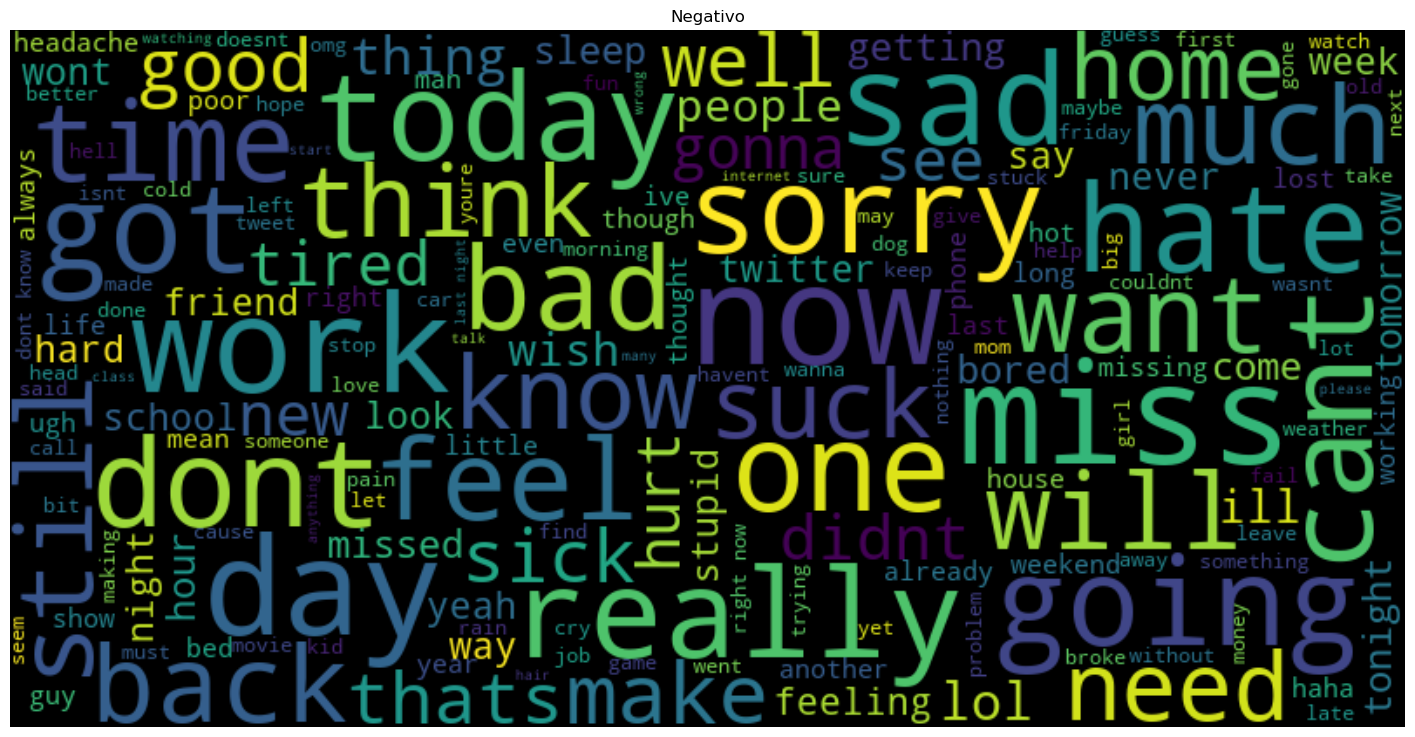

In [9]:
## STEP 2 : EDA con WORDCLOUD
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

wordcloud = WordCloud(background_color = 'black', width = 800, height = 400,
                      max_words = 180, contour_width = 3,
                      max_font_size = 80, contour_color = 'steelblue',
                      stopwords = STOPWORDS, random_state = 667)

wordcloud.generate(text_negative)

plt.figure(figsize=(18,10))
plt.title('Negativo')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")

(-0.5, 799.5, 399.5, -0.5)

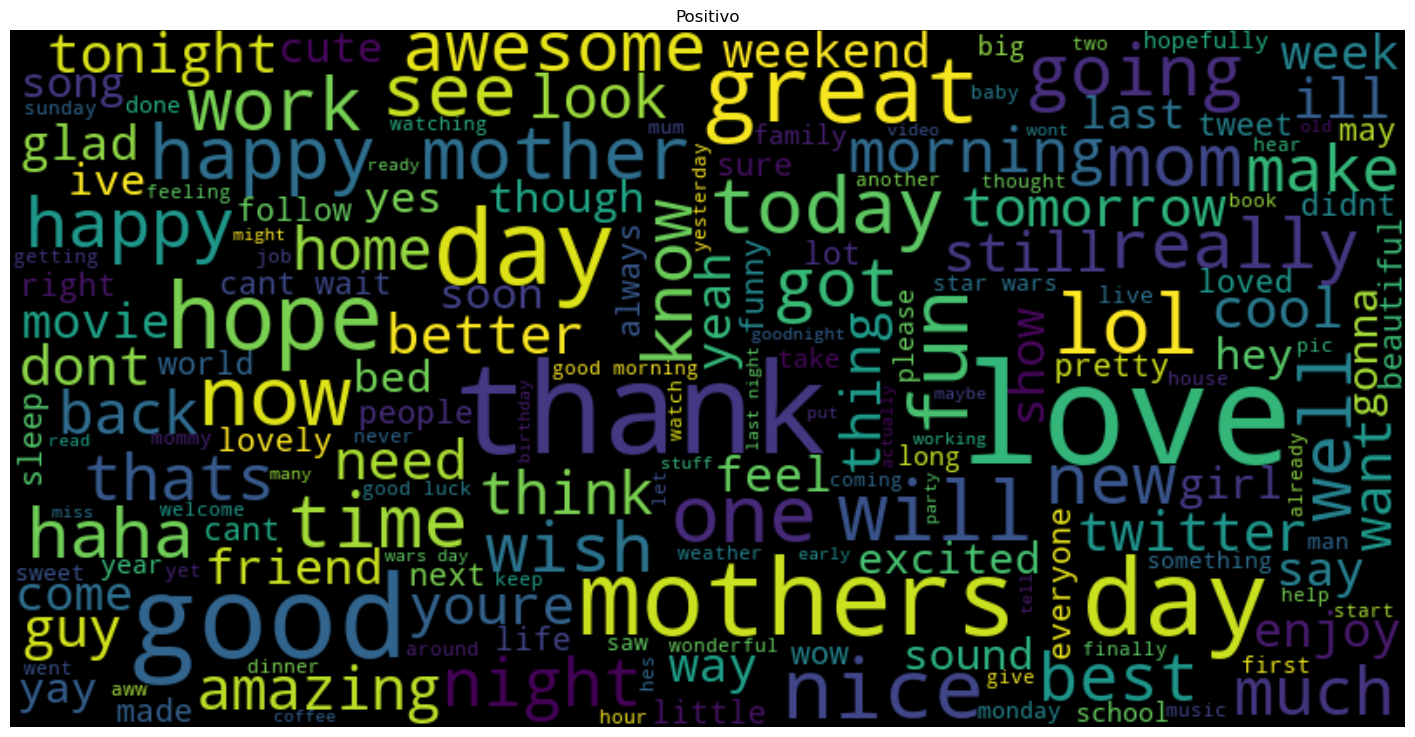

In [10]:
## STEP 2 : EDA con WORDCLOUD
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

wordcloud = WordCloud(background_color = 'black', width = 800, height = 400,
                      max_words = 180, contour_width = 3,
                      max_font_size = 80, contour_color = 'steelblue',
                      stopwords = STOPWORDS, random_state = 667)

wordcloud.generate(text_positive)

plt.figure(figsize=(18,10))
plt.title('Positivo')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")

In [11]:
df = df[['text','sentiment']]

In [12]:
df.isnull().sum()

text         1
sentiment    0
dtype: int64

In [13]:
df = df.dropna()

In [14]:
##STEP 3: Definizre X e y (features testuali e Target)
## rimuovere eventuali nan

X = df['text']
y = df['sentiment']

print(X.shape)

(27480,)


In [15]:
##STEP 4: Vettorizzazione
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(max_features=1500, min_df=5, max_df=0.7)
#vectorizer = CountVectorizer(stop_words='english')
X_vect = vectorizer.fit_transform(X).toarray()
X_vect

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [16]:
##STEP 5: TF-IDF
from sklearn.feature_extraction.text import TfidfTransformer

tfidfconverter = TfidfTransformer()
X_tfidf = tfidfconverter.fit_transform(X_vect).toarray()
X_tfidf

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [17]:
##STEP 6: Split Training and Test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y,
                                                    test_size=0.3, 
                                                    random_state=667
                                                    )

In [18]:
##STEP 7: Modellazione
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators=1000, random_state=667,max_depth=5)
classifier.fit(X_train, y_train) 

# accuracy score on the test data
y_pred = classifier.predict(X_test)
test_data_accuracy = accuracy_score(y_pred, y_test)
test_data_accuracy

0.46227559437166427

In [19]:
from sklearn.naive_bayes import MultinomialNB

classifier = MultinomialNB(alpha=0.1)
classifier.fit(X_train, y_train) 

# accuracy score on the test data
y_pred = classifier.predict(X_test)
test_data_accuracy = accuracy_score(y_pred, y_test)
test_data_accuracy

0.6507763221737021

In [20]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))#, target_names=labels))

              precision    recall  f1-score   support

    negative       0.73      0.52      0.61      2302
     neutral       0.57      0.79      0.66      3368
    positive       0.77      0.59      0.67      2574

    accuracy                           0.65      8244
   macro avg       0.69      0.63      0.65      8244
weighted avg       0.68      0.65      0.65      8244



Text(95.72222222222221, 0.5, 'Actual')

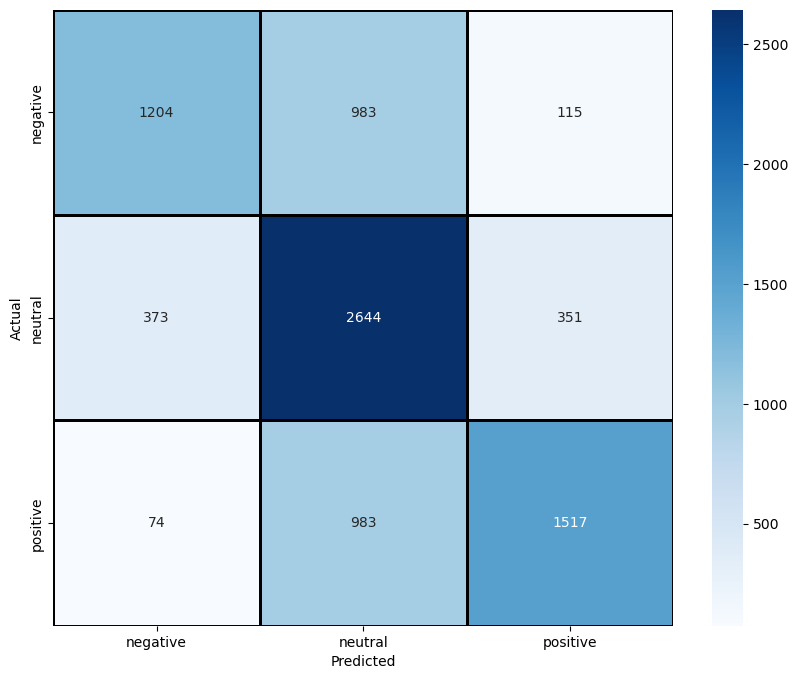

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix 

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (10,8))
sns.heatmap(cm,cmap= "Blues", 
            linecolor = 'black', 
            linewidth = 1, 
            annot = True, 
            fmt='', 
            xticklabels = classifier.classes_, 
            yticklabels = classifier.classes_)

plt.xlabel("Predicted")
plt.ylabel("Actual")

In [23]:
# Step 8: Pipeline Finale (nuovo train test split su dati raw tetuali)
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3, 
                                                    random_state=667
                                                    )


from sklearn.pipeline import Pipeline

bow = CountVectorizer(max_features=1500, min_df=5, max_df=0.7)
tfidf = TfidfTransformer()
clf = MultinomialNB(alpha=0.1)

pipe = Pipeline([
                ('bow',bow),
                ('tfidf',tfidf),
                ('clf',clf),
                ])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

test_data_accuracy = accuracy_score(y_test,y_pred)
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.6494420184376516


In [25]:
from sklearn.metrics import classification_report
#labels = ['class1', 'class2']
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    negative       0.73      0.51      0.60      2302
     neutral       0.57      0.79      0.66      3368
    positive       0.76      0.59      0.67      2574

    accuracy                           0.65      8244
   macro avg       0.69      0.63      0.64      8244
weighted avg       0.68      0.65      0.65      8244



In [27]:
# Step 10: Cross Validation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(pipe, X, y, scoring = 'f1_micro', cv = 8)

print(f'scores={scores}')
print(f'mean={np.mean(scores)}')
print(f'std={np.std(scores)}')

scores=[0.64541485 0.64075691 0.64774381 0.65152838 0.66375546 0.65152838
 0.64687045 0.64425036]
mean=0.648981077147016
std=0.0065190102422711515


In [28]:
import joblib
joblib.dump(pipe,'NLPEs2.pkl')

['NLPEs2.pkl']

In [29]:
import joblib

uploaded_model = joblib.load('NLPEs2.pkl')
pred = uploaded_model.predict(['very beautiful']) #
pred[0]

'positive'